In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import theano.tensor as tt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=np.random.randn(100))

    approx = pm.variational.advi()


Average ELBO = -181.89: 100%|███████████| 5000/5000 [00:00<00:00, 13368.38it/s]


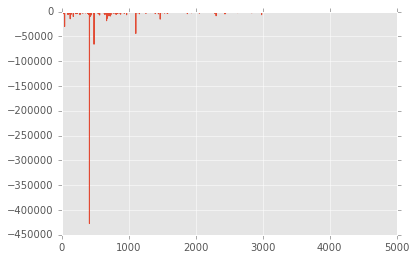

In [8]:
plt.plot(approx.elbo_vals)

In [9]:
approx.means

{'mu': array(0.03346215277625487), 'sd_log_': array(0.22810519056679296)}

In [43]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=np.random.normal(20,3,1000))

    means, sds, elbos = pm.variational.advi(n = 200000)


Average ELBO = -2,714.4: 100%|██████| 200000/200000 [00:16<00:00, 12335.28it/s]


In [44]:
means

{'mu': array(19.764978496981595), 'sd_log_': array(1.0868535339223486)}

In [45]:
sds

{'mu': 0.10180038270751704, 'sd_log_': 0.02445263183512577}

In [46]:
elbos

array([ -9.89222124e+05,  -4.49434503e+06,  -1.11947810e+05, ...,
        -2.71375571e+03,  -2.71444374e+03,  -2.71370145e+03])

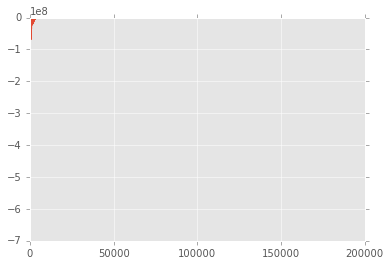

In [48]:
plt.plot(elbos)

In [47]:
np.exp(means['sd_log_'])

2.9649303276850381

In [37]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=np.random.normal(20,3,1000))
    
    trace = pm.sample(1000)


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 604.66it/s]


In [38]:
trace.varnames

['mu', 'sd_log_', 'sd']

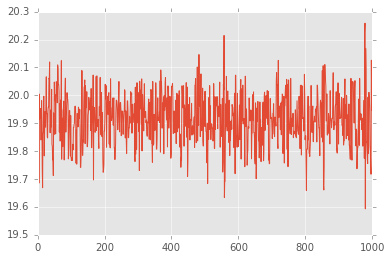

In [39]:
plt.plot(trace['mu'])

In [40]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sd = pm.HalfNormal('sd', sd=1)
    obs = pm.Normal('obs', mu=mu, sd=sd, observed=np.random.normal(20,3,1000))
    
    trace2 = pm.sample(1000,init=None)


100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 273.42it/s]


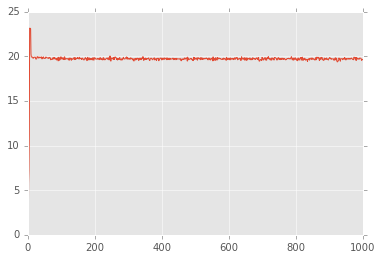

In [42]:
plt.plot(trace2['mu'])